In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import math

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense # dense network
from keras.layers import LSTM, Flatten, Dropout
from sklearn.metrics import mean_squared_error # metrices
from sklearn.metrics import r2_score # r2 value
from sklearn.metrics import mean_absolute_error as mae # MAE value
from scipy import stats

In [2]:
#importing the data file in csv format from google drive files
df = pd.read_csv('/content/drive/MyDrive/BPH_MLP_LSTM/CH.csv')

In [3]:
df

,Year,SMW,Temp,RH,RF,BPH
0,20-08-2012,34,27.04,86.29,71.4,0.03
1,27-08-2012,35,28.16,78.86,144.4,0.10
2,03-09-2012,36,27.73,85.00,74.2,0.22
3,10-09-2012,37,27.80,83.00,26.6,0.08
4,17-09-2012,38,28.02,85.00,35.2,0.11
...,...,...,...,...,...,...
97,22-10-2020,43,26.47,62.29,0.0,2.73
98,29-10-2020,44,25.20,57.57,0.0,2.65
99,05-11-2020,45,21.59,54.86,0.0,4.10
100,12-11-2020,46,25.17,62.50,0.0,3.35


In [4]:
#information about columns in the data file like data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    102 non-null    object 
 1   SMW     102 non-null    int64  
 2   Temp    102 non-null    float64
 3   RH      102 non-null    float64
 4   RF      102 non-null    float64
 5   BPH     102 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.9+ KB


In [5]:
#Formating the Date column to date, month and year format
#df ['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

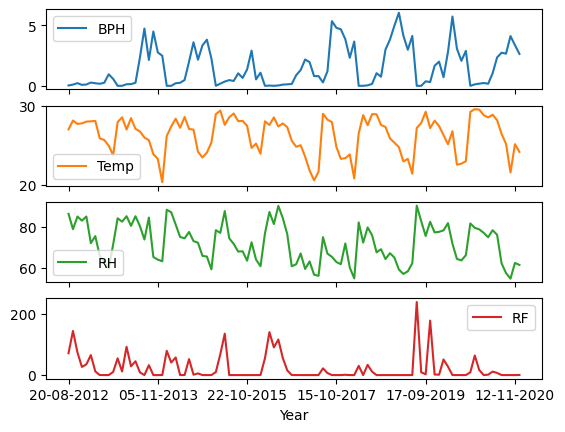

In [6]:
#Indexing the Date column for plotting
df.set_index('Year')[['BPH','Temp','RH','RF']].plot(subplots=True)

In [7]:
#information of data frame
df

,Year,SMW,Temp,RH,RF,BPH
0,20-08-2012,34,27.04,86.29,71.4,0.03
1,27-08-2012,35,28.16,78.86,144.4,0.10
2,03-09-2012,36,27.73,85.00,74.2,0.22
3,10-09-2012,37,27.80,83.00,26.6,0.08
4,17-09-2012,38,28.02,85.00,35.2,0.11
...,...,...,...,...,...,...
97,22-10-2020,43,26.47,62.29,0.0,2.73
98,29-10-2020,44,25.20,57.57,0.0,2.65
99,05-11-2020,45,21.59,54.86,0.0,4.10
100,12-11-2020,46,25.17,62.50,0.0,3.35


In [8]:
# Indexing the date column
df.set_index('Year', inplace = True)

In [9]:
# Information of data frame
df

,SMW,Temp,RH,RF,BPH
Year,,,,,
20-08-2012,34,27.04,86.29,71.4,0.03
27-08-2012,35,28.16,78.86,144.4,0.10
03-09-2012,36,27.73,85.00,74.2,0.22
10-09-2012,37,27.80,83.00,26.6,0.08
17-09-2012,38,28.02,85.00,35.2,0.11
...,...,...,...,...,...
22-10-2020,43,26.47,62.29,0.0,2.73
29-10-2020,44,25.20,57.57,0.0,2.65
05-11-2020,45,21.59,54.86,0.0,4.10


In [10]:
# reversing the indexing of date column
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    102 non-null    object 
 1   SMW     102 non-null    int64  
 2   Temp    102 non-null    float64
 3   RH      102 non-null    float64
 4   RF      102 non-null    float64
 5   BPH     102 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.9+ KB


In [11]:
# printing the information about the data frame
print ("Rows     : " , df.shape[0])
print ("Columns   : ", df.shape[1])
print ("\nFeatures :\n" , df.columns.tolist())
print ("\nMissing values :  " , df.isnull().any())
print ("\nUnique values : \n", df.nunique())

Rows     :  102
Columns   :  5

Features :
 ['SMW', 'Temp', 'RH', 'RF', 'BPH']

Missing values :   SMW     False
Temp    False
RH      False
RF      False
BPH     False
dtype: bool

Unique values : 
 SMW     15
Temp    94
RH      94
RF      51
BPH     81
dtype: int64


In [12]:
# plotting the weekly means
#df.resample('W').mean().plot(subplots=True)

In [13]:
#removing the index from df
n_df=df.reset_index()

In [14]:
n_df

,Year,SMW,Temp,RH,RF,BPH
0,20-08-2012,34,27.04,86.29,71.4,0.03
1,27-08-2012,35,28.16,78.86,144.4,0.10
2,03-09-2012,36,27.73,85.00,74.2,0.22
3,10-09-2012,37,27.80,83.00,26.6,0.08
4,17-09-2012,38,28.02,85.00,35.2,0.11
...,...,...,...,...,...,...
97,22-10-2020,43,26.47,62.29,0.0,2.73
98,29-10-2020,44,25.20,57.57,0.0,2.65
99,05-11-2020,45,21.59,54.86,0.0,4.10
100,12-11-2020,46,25.17,62.50,0.0,3.35


In [15]:
print ("Rows     : " , n_df.shape[0])
print ("Columns   : ", n_df.shape[1])
print ("\nFeatures :\n" , n_df.columns.tolist())
print ("\nMissing values :  " , n_df.isnull().any())
print ("\nUnique values : \n", n_df.nunique())

Rows     :  102
Columns   :  6

Features :
 ['Year', 'SMW', 'Temp', 'RH', 'RF', 'BPH']

Missing values :   Year    False
SMW     False
Temp    False
RH      False
RF      False
BPH     False
dtype: bool

Unique values : 
 Year    102
SMW      15
Temp     94
RH       94
RF       51
BPH      81
dtype: int64


In [16]:
#defining the new data frame as df_input
df_input=n_df[['BPH','Temp','RH','RF']]
df_input

,BPH,Temp,RH,RF
0,0.03,27.04,86.29,71.4
1,0.10,28.16,78.86,144.4
2,0.22,27.73,85.00,74.2
3,0.08,27.80,83.00,26.6
4,0.11,28.02,85.00,35.2
...,...,...,...,...
97,2.73,26.47,62.29,0.0
98,2.65,25.20,57.57,0.0
99,4.10,21.59,54.86,0.0
100,3.35,25.17,62.50,0.0


In [17]:
# descriptive statistics of df
df_input.describe()

,BPH,Temp,RH,RF
count,102.000000,102.000000,102.000000,102.000000
mean,1.527745,26.283627,72.152647,23.151961
std,1.637133,2.329471,9.461082,42.634783
min,0.000000,20.360000,54.860000,0.000000
25%,0.162500,24.797500,63.800000,0.000000
50%,0.800000,27.065000,72.430000,0.200000
75%,2.710000,28.102500,79.657500,29.800000
max,6.020000,29.590000,90.290000,239.000000


In [18]:
#Normalize the data/Scaling the data from 0 to 1
scaler = MinMaxScaler()
data_scaled =scaler.fit_transform(df_input)

In [19]:
# info about scaled data
data_scaled

array([[0.00498339, 0.72372698, 0.88710133, 0.29874477],
       [0.0166113 , 0.84507042, 0.67739204, 0.6041841 ],
       [0.03654485, 0.79848321, 0.8506915 , 0.31046025],
       [0.01328904, 0.80606717, 0.79424217, 0.11129707],
       [0.01827243, 0.82990249, 0.8506915 , 0.14728033],
       [0.0448505 , 0.83423619, 0.48574654, 0.27364017],
       [0.03488372, 0.8396533 , 0.58255715, 0.05020921],
       [0.0282392 , 0.60021668, 0.31047135, 0.        ],
       [0.04152824, 0.57854821, 0.22579735, 0.        ],
       [0.15780731, 0.50162514, 0.13914762, 0.        ],
       [0.09468439, 0.36944745, 0.46768275, 0.04309623],
       [0.        , 0.82340195, 0.82641829, 0.2292887 ],
       [0.        , 0.88840737, 0.78012983, 0.04853556],
       [0.02159468, 0.72156013, 0.85464296, 0.3874477 ],
       [0.02325581, 0.87757313, 0.7236805 , 0.11966527],
       [0.04152824, 0.73022752, 0.85464296, 0.18912134],
       [0.39036545, 0.69555796, 0.71775332, 0.03598326],
       [0.78405316, 0.61213434,

In [20]:
# defining the input and output
features = data_scaled
target = data_scaled[:,0]

In [21]:
# Generating the sequential time series with length of 1 day
TimeseriesGenerator(features, target, length = 1, sampling_rate = 1, batch_size=1)[0]

(array([[[0.00498339, 0.72372698, 0.88710133, 0.29874477]]]),
 array([0.0166113]))

In [22]:
# Splitting the input and output data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 555, shuffle = False)

In [23]:
#input shape of training data after splitting
x_train.shape

(71, 4)

In [24]:
#input shape of testing data after splitting
x_test.shape

(31, 4)

In [25]:
# traing and testing data generation
win_length = 1 # 1 day
batch_size = 1
num_features = 4 # 4 features(YSB, Temp, RH, RF)
train_generator = TimeseriesGenerator(x_train, y_train, length = win_length, sampling_rate = 1, batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length = win_length, sampling_rate = 1, batch_size = batch_size)

In [26]:
# LSTM model topology
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(100,input_shape=(win_length, num_features), return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(100, return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(50, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [27]:
# model = Sequential()
# model.add(LSTM(64, activation = 'sigmoid', input_shape = (win_length, num_features)))
# model.add(Dense(32))
# model.add(Dense(1, activation = 'sigmoid'))

In [28]:
#summary of model (no. of nodes in each hidden layer and output layer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            42000     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 100)            80400     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1, 100)            0         
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0

In [29]:
# model fitting
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
 #                                                 patience = 2,
 #                                                 mode = 'min')
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam(),
              metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False)
#                              callbacks=[early_stopping])


Epoch 1/50


<ipython-input-29-e383c72d4c62>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 50,


70/70 [==============================] - 9s 26ms/step - loss: 0.0709 - mean_absolute_error: 0.1784 - val_loss: 0.1098 - val_mean_absolute_error: 0.2788
Epoch 2/50
70/70 [==============================] - 1s 9ms/step - loss: 0.0602 - mean_absolute_error: 0.1982 - val_loss: 0.0885 - val_mean_absolute_error: 0.2511
Epoch 3/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0500 - mean_absolute_error: 0.1768 - val_loss: 0.0629 - val_mean_absolute_error: 0.1964
Epoch 4/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0420 - mean_absolute_error: 0.1440 - val_loss: 0.0546 - val_mean_absolute_error: 0.1767
Epoch 5/50
70/70 [==============================] - 1s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.1388 - val_loss: 0.0530 - val_mean_absolute_error: 0.1748
Epoch 6/50
70/70 [==============================] - 1s 8ms/step - loss: 0.0368 - mean_absolute_error: 0.1328 - val_loss: 0.0543 - val_mean_absolute_error: 0.1789
Epoch 7/50
70/70 [==================

In [30]:
# Extracting feature importance
first_layer_weights = model.layers[0].get_weights()[0]
feature_importance_weights = np.mean(np.abs(first_layer_weights), axis=1)
feature_importance = feature_importance_weights / np.sum(feature_importance_weights)*100

In [31]:
# Print feature importance
feature_names = ['BPH(t-1)', 'Temperature', 'Relative Humidity', 'Rainfall']
for name, importance in zip(feature_names, feature_importance):
    print(f'{name}: {importance:.4f}')

BPH(t-1): 27.4336
Temperature: 24.4619
Relative Humidity: 18.2045
Rainfall: 29.9000


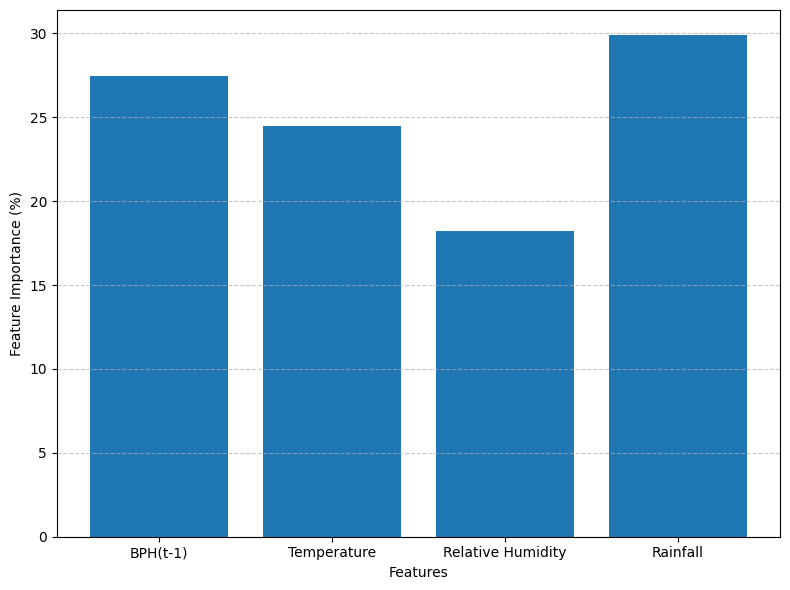

In [63]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importance)
#plt.title('Feature Importance from MLP Model Weights')
plt.xlabel('Features')
plt.ylabel('Feature Importance (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('LSTM_feature_importance.pdf', dpi=300)
plt.show()

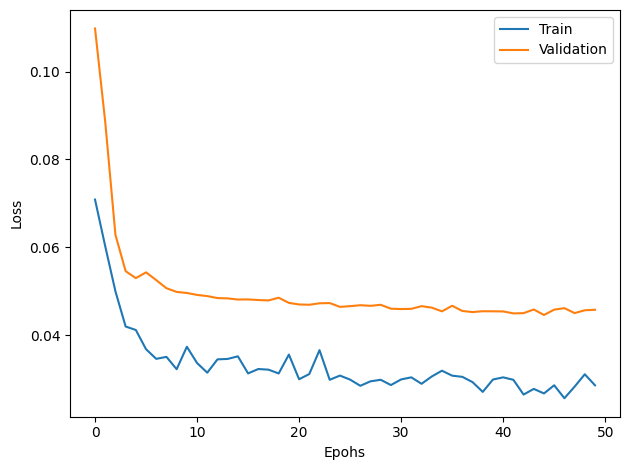

In [33]:
# Model training and validation Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epohs')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.tight_layout()
#plt.savefig('LSTM_model_loss.pdf', dpi=300)
plt.show()

In [34]:
#model evaluation
model.evaluate_generator(train_generator, verbose = 0)
model.evaluate_generator(test_generator, verbose = 0)

<ipython-input-34-d041f2dfc28d>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator, verbose = 0)
<ipython-input-34-d041f2dfc28d>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose = 0)


[0.04578513652086258, 0.17427963018417358]

In [35]:
# prediction of training and testing data
predictions_train = model.predict_generator(train_generator)
predictions_test = model.predict_generator(test_generator)

<ipython-input-35-fc2d809f150a>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_train = model.predict_generator(train_generator)
<ipython-input-35-fc2d809f150a>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_test = model.predict_generator(test_generator)


In [36]:
#shape of prediction train and test
predictions_train.shape[0], predictions_test.shape[0]

(70, 30)

In [37]:
# array of train and test predictions
predictions_train, predictions_test

(array([[0.083319  ],
        [0.04852447],
        [0.13074423],
        [0.12421331],
        [0.12976967],
        [0.14257655],
        [0.16163898],
        [0.12430871],
        [0.13303906],
        [0.22789824],
        [0.16148524],
        [0.09006119],
        [0.12022267],
        [0.09171642],
        [0.14224063],
        [0.15139478],
        [0.5309051 ],
        [0.67496604],
        [0.5111139 ],
        [0.5257935 ],
        [0.3616358 ],
        [0.20636323],
        [0.06943976],
        [0.09802515],
        [0.14210498],
        [0.16507897],
        [0.241199  ],
        [0.5149458 ],
        [0.6181857 ],
        [0.38578397],
        [0.4252379 ],
        [0.48536426],
        [0.37451977],
        [0.12237012],
        [0.13325407],
        [0.12421075],
        [0.23822317],
        [0.22553307],
        [0.34568787],
        [0.26532495],
        [0.36703932],
        [0.46711373],
        [0.17390756],
        [0.21625392],
        [0.08707677],
        [0

In [38]:
predictions_train.shape

(70, 1)

In [39]:
#array of training and testing input data
x_train, x_test

(array([[0.00498339, 0.72372698, 0.88710133, 0.29874477],
        [0.0166113 , 0.84507042, 0.67739204, 0.6041841 ],
        [0.03654485, 0.79848321, 0.8506915 , 0.31046025],
        [0.01328904, 0.80606717, 0.79424217, 0.11129707],
        [0.01827243, 0.82990249, 0.8506915 , 0.14728033],
        [0.0448505 , 0.83423619, 0.48574654, 0.27364017],
        [0.03488372, 0.8396533 , 0.58255715, 0.05020921],
        [0.0282392 , 0.60021668, 0.31047135, 0.        ],
        [0.04152824, 0.57854821, 0.22579735, 0.        ],
        [0.15780731, 0.50162514, 0.13914762, 0.        ],
        [0.09468439, 0.36944745, 0.46768275, 0.04309623],
        [0.        , 0.82340195, 0.82641829, 0.2292887 ],
        [0.        , 0.88840737, 0.78012983, 0.04853556],
        [0.02159468, 0.72156013, 0.85464296, 0.3874477 ],
        [0.02325581, 0.87757313, 0.7236805 , 0.11966527],
        [0.04152824, 0.73022752, 0.85464296, 0.18912134],
        [0.39036545, 0.69555796, 0.71775332, 0.03598326],
        [0.784

In [40]:
#array of training and testing output data
y_train, y_test

(array([0.00498339, 0.0166113 , 0.03654485, 0.01328904, 0.01827243,
        0.0448505 , 0.03488372, 0.0282392 , 0.04152824, 0.15780731,
        0.09468439, 0.        , 0.        , 0.02159468, 0.02325581,
        0.04152824, 0.39036545, 0.78405316, 0.3538206 , 0.74418605,
        0.45681063, 0.41196013, 0.        , 0.        , 0.03488372,
        0.04152824, 0.07973422, 0.33222591, 0.59634551, 0.35714286,
        0.55315615, 0.63122924, 0.37375415, 0.        , 0.02990033,
        0.05813953, 0.07807309, 0.06644518, 0.17109635, 0.10797342,
        0.22425249, 0.48172757, 0.08803987, 0.17940199, 0.        ,
        0.00332226, 0.        , 0.00498339, 0.0166113 , 0.01993355,
        0.02491694, 0.1461794 , 0.21594684, 0.36046512, 0.32392027,
        0.13289037, 0.13289037, 0.04651163, 0.19933555, 0.88538206,
        0.79401993, 0.77408638, 0.63787375, 0.38372093, 0.60631229,
        0.        , 0.        , 0.00664452, 0.02657807, 0.17275748,
        0.12458472]),
 array([0.49667774, 0.6328

In [41]:
# Slicing the output column from the train and test data
x_train[:,1:][win_length:], x_test[:,1:][win_length:]

(array([[0.84507042, 0.67739204, 0.6041841 ],
        [0.79848321, 0.8506915 , 0.31046025],
        [0.80606717, 0.79424217, 0.11129707],
        [0.82990249, 0.8506915 , 0.14728033],
        [0.83423619, 0.48574654, 0.27364017],
        [0.8396533 , 0.58255715, 0.05020921],
        [0.60021668, 0.31047135, 0.        ],
        [0.57854821, 0.22579735, 0.        ],
        [0.50162514, 0.13914762, 0.        ],
        [0.36944745, 0.46768275, 0.04309623],
        [0.82340195, 0.82641829, 0.2292887 ],
        [0.88840737, 0.78012983, 0.04853556],
        [0.72156013, 0.85464296, 0.3874477 ],
        [0.87757313, 0.7236805 , 0.11966527],
        [0.73022752, 0.85464296, 0.18912134],
        [0.69555796, 0.71775332, 0.03598326],
        [0.61213434, 0.5362687 , 0.        ],
        [0.57638137, 0.83657917, 0.13556485],
        [0.38461538, 0.29635902, 0.        ],
        [0.31960997, 0.2599492 , 0.        ],
        [0.        , 0.23793395, 0.        ],
        [0.63380282, 0.94355066, 0

In [42]:
# concatinating/appending the predicted and train/test dataframes into one dataframe
df_train_pred = pd.concat([pd.DataFrame(predictions_train), pd.DataFrame(x_train[:,1:][win_length:])], axis = 1)
df_test_pred = pd.concat([pd.DataFrame(predictions_test), pd.DataFrame(x_test[:,1:][win_length:])], axis = 1)

In [43]:
# inversing the normalized values of predicted and train/test dataframes
rev_trans_train = scaler.inverse_transform(df_train_pred)
rev_trans_test = scaler.inverse_transform(df_test_pred)

In [44]:
rev_trans_train, rev_trans_test

(array([[  0.50158039,  28.16      ,  78.86      , 144.4       ],
        [  0.29211728,  27.73      ,  85.        ,  74.2       ],
        [  0.78708029,  27.8       ,  83.        ,  26.6       ],
        [  0.74776411,  28.02      ,  85.        ,  35.2       ],
        [  0.7812134 ,  28.06      ,  72.07      ,  65.4       ],
        [  0.8583108 ,  28.11      ,  75.5       ,  12.        ],
        [  0.97306663,  25.9       ,  65.86      ,   0.        ],
        [  0.74833841,  25.7       ,  62.86      ,   0.        ],
        [  0.80089512,  24.99      ,  59.79      ,   0.        ],
        [  1.37194741,  23.77      ,  71.43      ,  10.3       ],
        [  0.97214114,  27.96      ,  84.14      ,  54.8       ],
        [  0.54216835,  28.56      ,  82.5       ,  11.6       ],
        [  0.72374045,  27.02      ,  85.14      ,  92.6       ],
        [  0.55213287,  28.46      ,  80.5       ,  28.6       ],
        [  0.85628858,  27.1       ,  85.14      ,  45.2       ],
        [ 

In [45]:
# Slicing the shape of train and test data frames based on prediction shapes
df_train_final = df_input[:predictions_train.shape[0]]
df_test_final = df_input[predictions_test.shape[0]*-1:]

In [46]:
df_train_final.count(), df_test_final.count()

(BPH     70
 Temp    70
 RH      70
 RF      70
 dtype: int64,
 BPH     30
 Temp    30
 RH      30
 RF      30
 dtype: int64)

In [47]:
# Appending the predicted column to the train and test dataframe
df_train_final['BPH_Pred'] = rev_trans_train[:,0]
df_test_final['BPH_Pred'] = rev_trans_test[:,0]

<ipython-input-47-4c90a41468cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_final['BPH_Pred'] = rev_trans_train[:,0]
<ipython-input-47-4c90a41468cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final['BPH_Pred'] = rev_trans_test[:,0]


In [48]:
df_train_final

,BPH,Temp,RH,RF,BPH_Pred
0,0.03,27.04,86.29,71.4,0.501580
1,0.10,28.16,78.86,144.4,0.292117
2,0.22,27.73,85.00,74.2,0.787080
3,0.08,27.80,83.00,26.6,0.747764
4,0.11,28.02,85.00,35.2,0.781213
...,...,...,...,...,...
65,0.00,26.54,82.14,30.2,0.575606
66,0.00,28.84,72.36,0.0,0.754355
67,0.04,27.57,79.71,33.4,0.643244
68,0.16,28.97,75.93,11.0,0.967161


In [49]:
df_test_final

,BPH,Temp,RH,RF,BPH_Pred
72,3.81,25.90,67.21,0.0,3.209951
73,4.96,25.36,65.07,0.0,3.402806
74,6.02,24.79,59.29,0.0,3.729844
75,4.14,22.99,57.14,0.0,3.791093
76,2.97,23.31,58.43,0.0,2.471679
77,4.11,21.44,62.29,0.0,2.099174
78,0.00,27.21,90.29,239.0,2.172426
79,0.00,27.84,82.71,9.2,-0.344288
80,0.37,29.27,75.57,2.4,0.698530
81,0.31,27.20,82.43,178.1,1.346766


In [50]:
# calculate root mean square error (RMSE)

trainScore = math.sqrt(mean_squared_error(df_train_final['BPH'], df_train_final['BPH_Pred']))
print('Train Score: %2f RMSE' %(trainScore))

testScore = math.sqrt(mean_squared_error(df_test_final['BPH'], df_test_final['BPH_Pred']))
print('Test Score: %2f RMSE' %(testScore))

# calculate coefficient of determination (r2)

r2 = r2_score(df_train_final['BPH'], df_train_final['BPH_Pred'])
print(('Train Score: %2f r2' %(r2)))

r2 = r2_score(df_test_final['BPH'], df_test_final['BPH_Pred'])
print(('Test Score: %2f r2' %(r2)))

# calculate mean absolute error (MAE)

MAE = mae(df_train_final['BPH'], df_train_final['BPH_Pred'])
print(('Train Score: %2f MAE' %(MAE)))

MAE = mae(df_test_final['BPH'], df_test_final['BPH_Pred'])
print(('Test Score: %2f MAE' %(MAE)))

Train Score: 0.759312 RMSE
Test Score: 1.288127 RMSE
Train Score: 0.734421 r2
Test Score: 0.470733 r2
Train Score: 0.667963 MAE
Test Score: 1.049163 MAE


In [51]:
#Calculating Pseudo r squared values for train data (used for non-linear regression models)
def pseudo_r2_mlp(x_true, x_pred):

    # Ensure correct shapes for y_true and y_pred
    x_true = df_train_final['BPH'].values
    x_pred = df_train_final['BPH_Pred'].values

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(df_train_final['BPH'], df_train_final['BPH_Pred'])

    # Calculate variance of ground truth (adjusted for potential bias)
    var_true = np.var(df_train_final['BPH'], ddof=1)  # Use ddof=1 for unbiased variance

    # Handle potential division by zero (if variance is very small)
    if var_true < 1e-10:
        var_true = 1e-10  # Set a small minimum value to avoid zero division

    # Calculate pseudo R-squared
    pseudo_r2 = 1 - (mse / var_true)

    return pseudo_r2

In [52]:
#Calculating Pseudo r squared values for train data (used for non-linear regression models)

x_true = df_train_final['BPH'].values
x_pred = df_train_final['BPH_Pred'].values
pseudo_r2_value = pseudo_r2_mlp(x_true, x_pred)
print("Pseudo R-squared train data:", pseudo_r2_value)

Pseudo R-squared train data: 0.7382152491029983


In [53]:
#Calculating Pseudo r squared values for test data (used for non-linear regression models)
def pseudo_r2_mlp(y_true, y_pred):

    # Ensure correct shapes for y_true and y_pred
    y_true = df_test_final['BPH'].values
    y_pred = df_test_final['BPH_Pred'].values

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(df_test_final['BPH'], df_test_final['BPH_Pred'])

    # Calculate variance of ground truth (adjusted for potential bias)
    var_true = np.var(df_test_final['BPH'], ddof=1)  # Use ddof=1 for unbiased variance

    # Handle potential division by zero (if variance is very small)
    if var_true < 1e-10:
        var_true = 1e-10  # Set a small minimum value to avoid zero division

    # Calculate pseudo R-squared
    pseudo_r2 = 1 - (mse / var_true)

    return pseudo_r2

In [54]:
#Calculating Pseudo r squared values for test data (used for non-linear regression models)
y_true = df_test_final['BPH'].values
y_pred = df_test_final['BPH_Pred'].values
pseudo_r2_value = pseudo_r2_mlp(x_true, x_pred)
print("Pseudo R-squared test data:", pseudo_r2_value)

Pseudo R-squared test data: 0.4883751337958403


In [55]:
print("Train start Date: ", n_df['Year'].iloc[0]) # start date of training data
print("Train end Date: ", n_df['Year'].iloc[69]) # End date of traing data (look s.no. train_data_final)
print("Test start Date: ", n_df['Year'].iloc[72]) # start date of test data
print("Test end Date: ", n_df['Year'].iloc[101]) # End date of test data (look s.no. test_data_final)

Train start Date:  20-08-2012
Train end Date:  01-10-2018
Test start Date:  22-10-2018
Test end Date:  19-11-2020


In [56]:
# train_data_export
train_act_pred = pd.DataFrame(columns=['MSW', 'Actual', 'Predicted'])
#train_act_pred['Date'] = pd.date_range(start='2017-09-01', end = '2020-12-04') # change the end date according to test size
train_act_pred['MSW'] = range(1,71)
train_act_pred['Actual'] = df_train_final['BPH']
train_act_pred['Predicted'] = df_train_final['BPH_Pred']
train_act_pred.to_csv('LSTM_train_act_pred.csv')

In [57]:
# test_data_export
test_act_pred = pd.DataFrame(columns=['MSW', 'Actual', 'Predicted'])
#test_act_pred['Date'] = pd.date_range(start='2020-12-07', end = '2022-04-30') # change the end date according to test size
test_act_pred['MSW'] = range (72,102)
df_test_final = df_test_final.set_index(test_act_pred.index) # set the both dataframes index same
test_act_pred['Actual'] = df_test_final['BPH']
test_act_pred['Predicted'] = df_test_final['BPH_Pred']
test_act_pred.to_csv('LSTM_test_act_pred.csv')

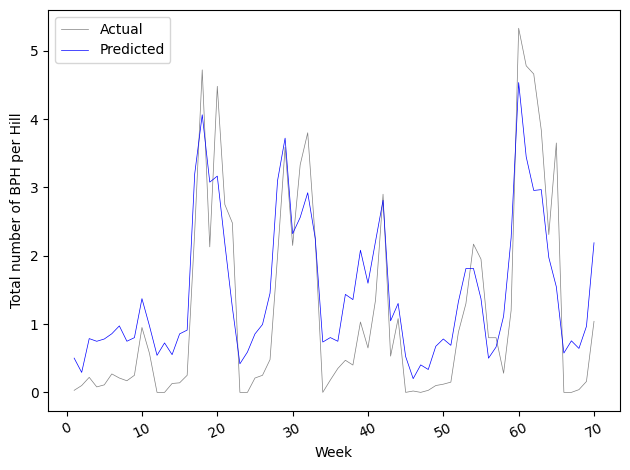

In [58]:
# train plot
plt.plot(train_act_pred['MSW'], train_act_pred['Actual'], color = 'grey', lw = 0.5)
plt.plot(train_act_pred['MSW'], train_act_pred['Predicted'], color = 'blue', lw = 0.5)
plt.ylabel('Total number of BPH per Hill')
plt.xlabel('Week')
plt.xticks(rotation = 25)
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.savefig('LSTM_train_actual_predicted.pdf', dpi=300)
plt.show()

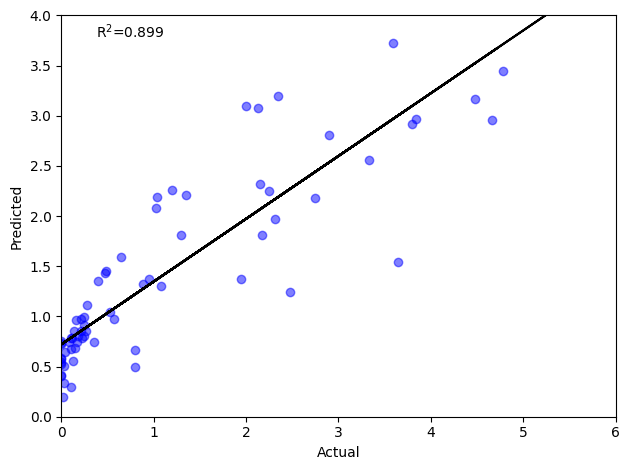

In [59]:
# Scatter plot with regression line
plt.scatter(train_act_pred['Actual'],train_act_pred['Predicted'], color = 'blue', alpha = 0.5)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(train_act_pred['Actual'], train_act_pred['Predicted'], 1)
#add linear regression line to scatterplot
plt.plot(train_act_pred['Actual'], m*train_act_pred['Actual']+b, color='black') #(x, m*x+b)
plt.xlim(0,6)
plt.ylim(0,4)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.tight_layout()
#plt.legend('R2: ' + str(r2_score(train_act_pred['Actual'], train_act_pred['Predicted'])))
rvalue = stats.linregress(train_act_pred['Actual'],train_act_pred['Predicted'])
plt.annotate("R$^2$=%.3f"%(rvalue.rvalue),xy=(0.15,0.9),xycoords='figure fraction')
plt.savefig('LSTM_train_actual_scatter_plot.pdf', dpi=300)
plt.show()

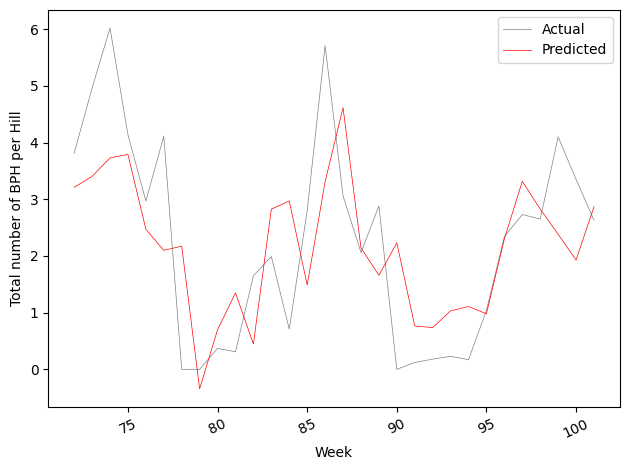

In [60]:
# test plot
plt.plot(test_act_pred['MSW'], test_act_pred['Actual'], color = 'grey', lw = 0.5)
plt.plot(test_act_pred['MSW'], test_act_pred['Predicted'], color = 'red', lw = 0.5)
plt.ylabel('Total number of BPH per Hill')
plt.xlabel('Week')
plt.xticks(rotation = 25)
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.savefig('LSTM_test_actual_predicted.pdf', dpi=300)
plt.show()

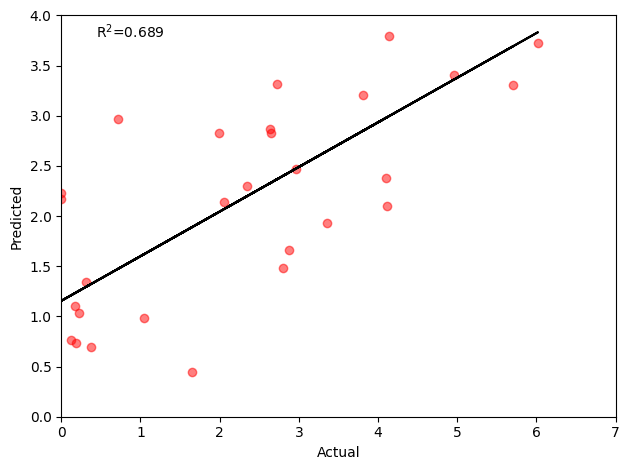

In [61]:
# Scatter plot with regression line
plt.scatter(test_act_pred['Actual'],test_act_pred['Predicted'], color = 'red', alpha = 0.5)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(test_act_pred['Actual'], test_act_pred['Predicted'], 1)
#add linear regression line to scatterplot
plt.plot(test_act_pred['Actual'], m*test_act_pred['Actual']+b, color='black') #(x, m*x+b)
plt.xlim(0,7)
plt.ylim(0,4)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.tight_layout()
rvalue = stats.linregress(test_act_pred['Actual'],test_act_pred['Predicted'])
plt.annotate("R$^2$=%.3f"%(rvalue.rvalue),xy=(0.15,0.9),xycoords='figure fraction')
plt.savefig('LSTM_test_actual_scatter_plot.pdf', dpi=300)
plt.show()